# Motion fitting

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from lib.folder import FolderMg

In [2]:
dataPath = "algo_data"
dataMg = FolderMg(dataPath)
dataMg.ls()


Current Folder 'algo_data' contains NO folders


Current Folder 'algo_data' contains 5 files, which are:
  - 202308011345.csv
  - 202308011630.csv
  - 202308011641.csv
  - 202308011646.csv
  - 202308011653.csv
  - ...


In [3]:
file = dataMg.files[0]

In [13]:
df = pd.read_csv(file,header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.690869e+09,0.999999,-0.001367,0.0,1.186429,0.001367,0.999999,0.0,14.404104,0.0,...,0.0,0.0,0.0,1.0,0.260077,13.549458,-1.026765,0.868028,1.0,0.0
1,1.690869e+09,1.000000,-0.000117,0.0,0.763158,0.000117,1.000000,0.0,-0.208957,0.0,...,0.0,0.0,0.0,1.0,2.968373,3.883468,-2.160421,0.862656,1.0,0.0
2,1.690869e+09,0.999989,0.004693,0.0,-2.326659,-0.004693,0.999989,0.0,-4.399785,0.0,...,0.0,0.0,0.0,1.0,-3.111334,3.885778,1.012583,0.932010,1.0,0.0
3,1.690869e+09,0.999996,0.002930,0.0,-1.574735,-0.002930,0.999996,0.0,-0.913088,0.0,...,0.0,0.0,0.0,1.0,3.246491,3.874068,3.998589,1.010546,1.0,0.0
4,1.690869e+09,1.000000,0.000299,0.0,0.185098,-0.000299,1.000000,0.0,10.395807,0.0,...,0.0,0.0,0.0,1.0,3.266678,3.869934,-2.342584,1.028321,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,1.690869e+09,0.999867,0.016296,0.0,-12.470753,-0.016296,0.999867,0.0,-8.239095,0.0,...,0.0,0.0,0.0,1.0,0.997157,3.540704,16.131225,1.442117,1.0,0.0
664,1.690869e+09,0.999862,0.016593,0.0,-14.767041,-0.016593,0.999862,0.0,-23.317892,0.0,...,0.0,0.0,0.0,1.0,-1.282625,3.540992,6.728377,1.292512,1.0,0.0
665,1.690869e+09,0.999929,0.011910,0.0,-14.510834,-0.011910,0.999929,0.0,-6.712325,0.0,...,0.0,0.0,0.0,1.0,-3.656521,3.845910,-29.245589,1.183670,1.0,0.0
666,1.690869e+09,0.999729,0.023261,0.0,-24.317446,-0.023261,0.999729,0.0,-1.211611,0.0,...,0.0,0.0,0.0,1.0,3.080454,3.806140,-6.737253,0.969143,1.0,0.0


In [14]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64')

In [32]:
pos_collection = []
for index, row in df.iterrows():
    transform_matrix = row[1:17]
    pos = np.array([transform_matrix[4],transform_matrix[8],transform_matrix[12]])
    pos_collection.append(pos)
pos_collection = np.array(pos_collection)
print(pos_collection.shape)


(668, 3)


In [42]:
timestamp= df[[0]].to_numpy().squeeze()
print(timestamp.shape)

(668,)


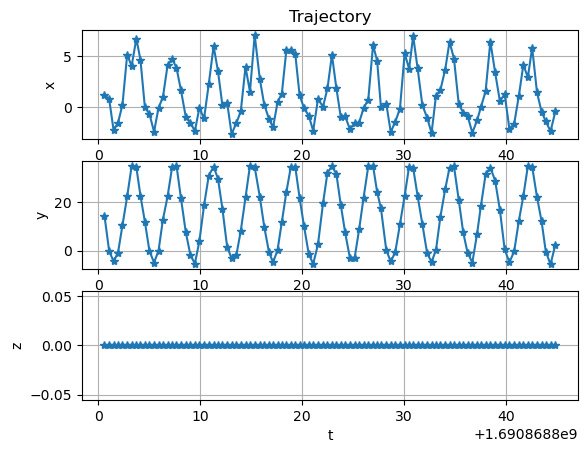

In [43]:
T = 100
trajectory = pos_collection[:T]
t = timestamp[:T]


fig = plt.figure()
ax = fig.add_subplot(311)
ax.plot(t, trajectory[:, 0], "*-")
ax.set_title("Trajectory")
ax.set_ylabel("x")
ax.grid()
ax = fig.add_subplot(312)
ax.plot(t, trajectory[:, 1], "*-")
ax.set_ylabel("y")
ax.grid()
ax = fig.add_subplot(313)
ax.plot(t, trajectory[:, 2], "*-")
ax.set_ylabel("z")
ax.set_xlabel("t")
ax.grid()
plt.show()

In [44]:
def fun(x,A,w,phi,B):
    return A*np.sin(w*t+phi)+B

In [52]:
popt, pcov = curve_fit(fun, t, trajectory[:,1],[10,0.3,0,0])

C:\Users\weike\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [50]:
print(np.linalg.cond(pcov),np.diag(pcov))

inf [inf inf inf inf]


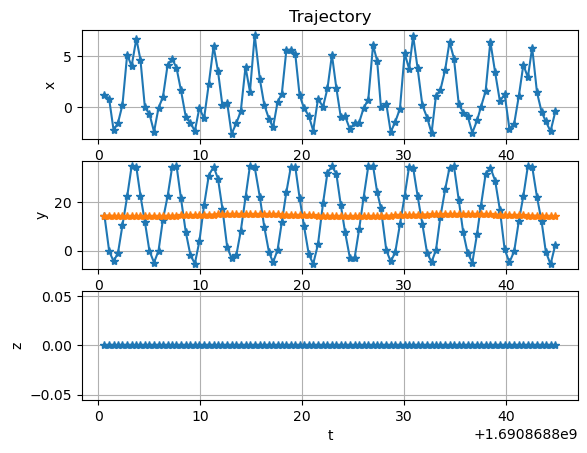

In [51]:
fig = plt.figure()
ax = fig.add_subplot(311)
ax.plot(t, trajectory[:, 0], "*-")
ax.set_title("Trajectory")
ax.set_ylabel("x")
ax.grid()
ax = fig.add_subplot(312)
ax.plot(t, trajectory[:, 1], "*-")
ax.plot(t, fun(t, popt[0],popt[1],popt[2],popt[3]),'*-')
ax.set_ylabel("y")
ax.grid()
ax = fig.add_subplot(313)
ax.plot(t, trajectory[:, 2], "*-")
ax.set_ylabel("z")
ax.set_xlabel("t")
ax.grid()
plt.show()